<div id="toc"></div>

# Neuronale Netzwerke

## Grundlagen

Ein neuronales Netzwerk kann in vielerlei Hinsichten mit einem Gehirn verglichen werden. Ähnlich wie das Gehirn besteht ein neuronales Netzwerk aus vielen Neuronen. Es gibt verschiedene Arten von Neuronen, die sich unter anderem durch ihre Aktivierungsfunktionen unterscheiden. Auf Aktivierungsfunktionen wird in einem späteren Teil der Arbeit genauer eingegangen.
Grundsätzlich besitzt jedes Neuron Eingabewerte $x_j$ die mit Gewichten (Weights) $w_j$ verbunden sind. Noch dazu besitzt jedes Neuron ein Bias-Wert (Bias) $b$. All diese Faktoren haben Einfluss auf den Ausgabewert $z$ eines Neurons. Um diesen zu berechnen, wird die gewichtete Summe der Eingabewerte mit dem Bias addiert. (vgl. Nielsen, 2015, #Perceptrons) Mathematisch kann diese Berechnung folgendermaßen dargestellt werden:

$$z = \sum_{j=1}^n {w_j x_j + b}$$

Dabei steht $n$ für die Anzahl an Eingabewerten.

Mit einem einzelnen Neuron kann nicht viel angefangen werden, deswegen verbindet man die Neuronen miteinander, wodurch ein neuronales Netzwerk entsteht. Es gibt viele verschiedene Arten von neuronalen Netzwerken, das einfachste davon ist das sogenannte Feedforward Neural Network.
Bei dieser Variante werden Informationen kontinuierlich, d.h. ausschließlich von einer Schicht zur nächsthöheren, weitergeleitet. Es kann in drei Teile unterteilt werden: die Eingabeschicht, die verborgenen Schichten und die Ausgabeschicht. (ebd.)


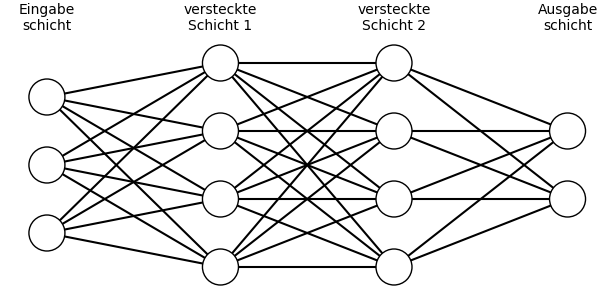

In [1]:
# Zeichne Netzwerk mit Code

from io import BytesIO
import matplotlib.pyplot as plt
from src.erstelle_netzwerk import zeichne_netzwerk
from src.hilfsfunktionen import erstelle_bild

grosse = 6
y_ratio = 0.5
zeichne_netzwerk(grosse, y_ratio, [3, 4, 4, 2])

bild = BytesIO()
plt.savefig(bild, format="png")
bild.seek(0)
plt.close()

erstelle_bild(bild, 500, "Neuronales Netzwerk")


### Die Eingabeschicht (Input Layer)

Die Input Layer empfängt die Daten von externen Quellen. Bei einem Zahlenerkennungsmodell beispielsweise würde die Eingabeschicht die Pixeldaten des Bildes repräsentieren. Dementsprechend würde ein 28x28-Bild 784 Eingabeneuronen benötigen. (vgl. Lheureux, o.J.)

### Die verborgenen Schichten (Hidden Layers)

Die verborgenen Schichten sind das, was neuronale Netzwerke so besonders macht. Sie verbinden die Eingabeschicht und die Ausgabeschicht miteinander. Je nach Schwierigkeitsgrad der Anwendung werden mehr und längere verborgene Schichten benötigt. Je mehr verborgene Neuronen es gibt, desto kompliziertere Berechnungen kann das neuronale Netzwerk durchführen. (ebd.)

### Ausgabeschicht (Output Layer)

Die Ausgabeschicht gibt die endgültige Ausgabe des neuronalen Netzwerkes zurück. In dem Zahlenerkennungsmodell wären das die Ziffern 0 bis 9. (ebd.)

## Forward Propagation

### Skalarprodukt

In Forward Propagation werden die Eingabewerte des neuronalen Netzwerkes zur nächsten Schicht weitergegeben, bis sie zur Ausgabeschicht kommen und eine Vorhersage (Prediction) liefern. (vgl. Anshumanm2fja, 2024)

Um das neuronale Netzwerk in der Programmierung umzusetzen, verwende ich die Programmiersprache Python in Kombination mit dem Paket "NumPy". Ein neuronales Netzwerk mit zwei Eingabeneuronen und einem Ausgabeneuron kann wie folgt dargestellt werden:

In [2]:
import numpy as np # Import des Pakets NumPy

inputs = [0.3, 0.6] # Die Eingabewerte der Eingabeneuronen
weights = [0.8, 0.2] # Die Gewichte der Eingabeneuronen
bias = 4 # Der Bias-Wert

# Berechnung des Ausgabewerts des Ausgabeneurons
output = inputs[0] * weights[0] + inputs[1] * weights[1] + bias
print(output)

4.36


Im Folgenden wird auch noch die Ausgabe eines neuronalen Netzwerkes mit zwei Eingabeneuronen und zwei Ausgabeneuronen programmatisch umgesetzt.'

In [3]:
inputs = [1.2, 3.2]
weights1 = [0.8, 1.3]  # Gewichte zwischen den Eingabeneuronen und dem ersten Ausgabeneuron
weights2 = [3.1, 1.6]  # Gewichte zwischen den Eingabeneuronen und dem zweiten Ausgabeneuron

bias1 = 4  # Bias-Wert für das erste Ausgabeneuron
bias2 = 3  # Bias-Wert für das zweite Ausgabeneuron

# Der Ausgabewert des ersten Ausgabeneurons
output1 = inputs[0] * weights1[0] + inputs[1] * weights1[1] + bias1

# Der Ausgabewert des zweiten Ausgabeneurons
output2 = inputs[0] * weights2[0] + inputs[1] * weights2[1] + bias2

print(output1, output2)

9.120000000000001 11.84


Jedoch ist diese Schreibweise sehr mühsam und ineffizient, weswegen zur Berechnung der Ausgabe Vektoren und Matrizen zusammen mit dem Skalarprodukt verwendet werden.

In [4]:
inputs = [1.2, 3.2]

# Gewichtsmatrix zwischen Eingabeneuronen und Ausgabeneuronen
weights = [
    [0.8, 1.3], # Gewichte für das erste Ausgabeneuron
    [3.1, 1.6], # Gewichte für das zweite Ausgabeneuron
]

bias = [4, 3] # Bias-Vektor für die Ausgabeneuronen

# Berechnung der Ausgabewerte durch Matrix-Vektor-Multiplikation
outputs = np.dot(weights, inputs) + bias  # Vektor von Ausgabewerten
print(outputs)

[ 9.12 11.84]


### Batches

Bis jetzt rechnet der Code jeweils nur eine Schicht pro Zyklus (Batch) aus. Um die Effizienz zu steigern, werden pro Zyklus mehrere Batches gemacht; das bietet den Vorteil der Parallelisierung von Operationen. Das Lernen von neuronalen Netzwerken wird in der Praxis mit GPUs (Graphics Processing Units) durchgeführt. GPUs besitzen eine hohe Anzahl an Prozessoren, wodurch auch aufwendige Berechnungen schnell durchgeführt werden können. Eine weitere essenzielle Eigenschaft von Batches ist die Normalisierung. Wenn mehrere Schichten gleichzeitig ausgeführt werden, kann die Schwankung der Ausgabewerte ausbalanciert werden; dadurch wird das Lernen stabiler und konsistenter.
(vgl. Kinsley, 2020, TC: 8:00)

Um Batches zu implementieren, wird die Eingabeliste in eine zweidimensionale Liste konvertiert:

In [5]:
# Matrix von Eingabewerten für 4 Batches, wobei jeder Batch 2 Eingabewerte enthält
inputs = [
    [1.2, 3.2],
    [3.2, 1.2],
    [4.2, 0.2],
    [3.1, 2.2],
]

outputs = np.dot(weights, inputs) + bias # Matrix von Ausgabewerte

ValueError: shapes (2,2) and (4,2) not aligned: 2 (dim 1) != 4 (dim 0)

Der Code liefert jetzt allerdings einen Fehler:


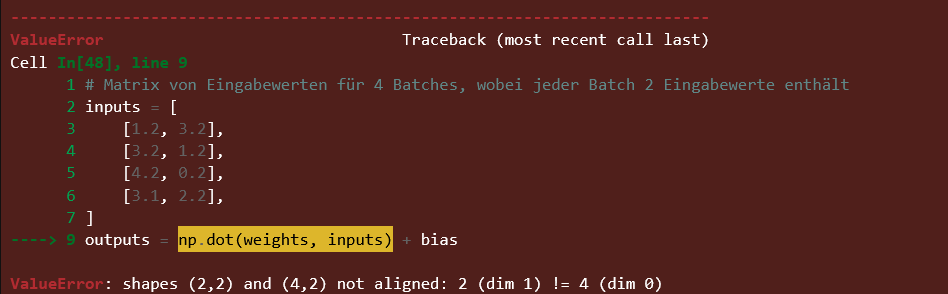

In [6]:
# Zeige den Error Fehler / lade gespeichertes Bild

with open("VWA/Batch-Code-Fehler.png", "rb") as bild_datei:
    erstelle_bild(bild_datei, 500, "Batch-Code-Fehler")

Dieser Fehler tritt auf, da bei der Matrixmultiplikation die Reihenfolge der Parameter zu beachten ist. Wird die Anzahl der Eingabeneuronen auf drei erhöht, so tritt ein ähnlicher Fehler auf. Das hat mit der Durchführung der Matrixmultiplikationen zu tun. Bei dieser werden die Zeilen mit den Reihen multipliziert; da allerdings in diesem Fall die Reihen und die Spalten unterschiedliche Längen haben, können die Multiplikationen nicht durchgeführt werden. Um diesen Fehler zu beheben, muss die Matrix transponiert werden, d.h., Zeilen und Reihen werden vertauscht. (vgl. Kinsley, 2020, TC: 16:26)

In [7]:
transposed_weights = np.array(weights).T # transponierte Gewichte
outputs = np.dot(inputs, transposed_weights) + bias # Matrix von Ausgabewerte
print(outputs)

[[ 9.12 11.84]
 [ 8.12 14.84]
 [ 7.62 16.34]
 [ 9.34 16.13]]


### Die Layer-Klasse

Um weitere Schichten hinzuzufügen, kann der bereits vorhandene Code wiederverwendet werden. Um dies effizient umzusetzen, bietet es sich an, Klassen zu schreiben. Die Klasse "Layer" dient hier als Bauplan für alle Schichten, die instanziiert werden, in diesem Fall "hidden_layer" und "output_layer".

In [8]:
class Layer:
    def __init__(self, n_inputs, n_neurons):
        """
        n_inputs: Anzahl an Eingabewerten (bzw. Neuronen der vorherigen Schicht).
        n_neurons: Anzahl an Neuronen für diese Schicht.
        """
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons) # Gewichtsmatrix
        self.bias = 0.1 * np.random.randn(1, n_neurons) # Bias-Vektor

    def forward(self, inputs):
        """
        Berechnung des Ausgabewerts für die Neuronen in dieser Schicht basierend
        auf den Eingabewerte "inputs".
        """
        self.saved_inputs = inputs # Eingabewerte für spätere Verwendung speichern
        outputs = np.dot(inputs, self.weights) + self.bias # Ausgabewerte als Matrix
        return outputs # Rückgabe der Ausgabewerte

# Eingabeschicht mit 2 Neuronen → verborgenen Schicht mit 4 Neuronen
hidden_layer = Layer(2, 4)

# Verborgenen Schicht mit 4 Neuronen → Ausgabeschicht mit 5 Neuronen
output_layer = Layer(4, 5)

# Ausgabewerte für die verborgene Schicht
hidden_layer_outputs = hidden_layer.forward(inputs)

# Ausgabewerte für die Ausgabeschicht
output_layer_outputs = output_layer.forward(hidden_layer_outputs)
print(output_layer_outputs)

[[-0.04999781  0.02061911  0.0185366   0.11467189  0.12638461]
 [-0.13271475 -0.0257346   0.07235038  0.11928273  0.10825878]
 [-0.17407321 -0.04891145  0.09925727  0.12158816  0.09919587]
 [-0.12167139 -0.01453033  0.06259736  0.11493533  0.12130089]]


Die Methode "forward" berechnet die Ausgabewerte "outputs" anhand der Eingabewerte "inputs", der Gewichtsmatrix "self.weights" und des Bias-Vektors "self.bias" und gibt diese zurück.
Die Ausgaben "hidden_layer_outputs" der verborgenen Schicht "hidden_layer" werden mit den Eingabewerten "inputs" aus der Eingabeschicht berechnet. Diese Ausgabewerte dienen als Eingaben für die nächste Schicht, die Ausgabeschicht "output_layer", um die "output_layer_outputs" des Netzwerks zu berechnen.

## Regression vs Klassifizierung

Für die späteren Kapitel ist es wichtig zwischen Regressions- und Klassifizierungsproblemen zu unterscheiden. Regression ist eine überwachte Lernmethode (Supervised Learning). Sie wird verwendet, um kontinuierliche numerische Werte vorherzusagen. Dabei wird eine Beziehung zwischen Eingangsvariablen und Ausgabewerten hergestellt. Typische Anwendungen umfassen zum Beispiel die Vorhersage von Verkaufszahlen, Temperaturen oder Immobilienpreisen. (vgl. Saxena, 2024)

Klassifizierung ist ebenfalls eine supervised Lernmethode, die darauf abzielt, Eingabedaten in diskrete Kategorien einzuteilen. Typische Anwendungen sind die Bilderkennung oder die Spam-Erkennung. (ebd.)

## Aktivierungsfunktionen (Activation Functions)

Ein neuronales Netzwerk ist im Wesentlichen eine Funktionsannäherung. Aktivierungsfunktionen ermöglichen es neuronalen Netzwerken, nicht-lineare Beziehungen zwischen Daten zu modellieren. Ein Neuron ohne Aktivierungsfunktion ist eine lineare Funktion. Besteht ein neuronales Netzwerk nur aus solchen Neuronen, dann kann dieses Netzwerk sich nur an lineare Funktionen annähern und besitzt somit nicht die Fähigkeit, komplexere Funktionen wie eine Sinusfunktion zu approximieren. (vgl. Kinsley, 2020, 7:47)


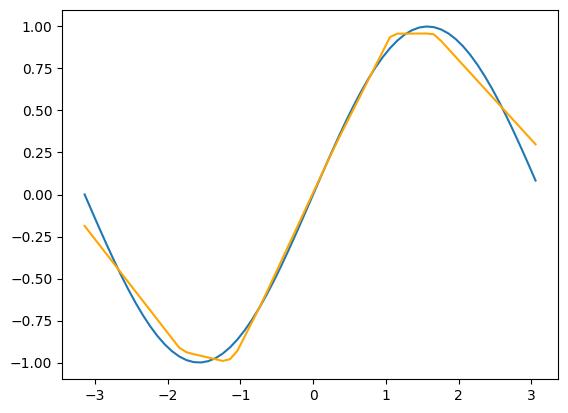

In [9]:
# Zeichne Sinus Funktionsannäherung mit Code

from matplotlib import animation
import matplotlib.pyplot as plt
from src import sin
import numpy as np
from io import BytesIO
from src.hilfsfunktionen import erstelle_bild
import math

sin_eingaben = np.arange(-math.pi, math.pi, 0.1)
sin_eingaben = sin_eingaben.reshape(len(sin_eingaben), 1)
ziele = np.sin(sin_eingaben)

netzwerk,_ = sin.trainiere_netzwerk(sin_eingaben, ziele)

vorhersagen = netzwerk.vorwaerts_durchlauf(sin_eingaben)
plt.plot(sin_eingaben, ziele, label="Wahre Funktion")
plt.plot(sin_eingaben, vorhersagen, label="Neuronales Netzwerk", color="orange")

bild = BytesIO()
plt.savefig(bild, format="png", bbox_inches='tight')
bild.seek(0)
plt.close()

erstelle_bild(bild, 400, "Lineare Funktionsannäherung einer Sinuskurve")

Um dieses Problem zu lösen, werden auf das Ergebnis der Neuronen Aktivierungsfunktionen angewendet. Es gibt verschiedene Arten von Aktivierungsfunktionen, zwei weit verbreitete und beliebte sind die Sigmoid-Funktion und ReLU-Funktion (Rectified Linear Unit Function). (vgl. Kinsley, 2020, TC: 7:52)

### Die Sigmoid-Funktion (Sigmoid Function)

Die Sigmoid-Funktion ist eine mathematische Funktion, die den Wertebereich auf ein bestimmtes Intervall beschränkt und eine S-förmige Kurve bildet. Es gibt verschiedene Varianten der Sigmoid-Funktion, eine davon ist die logistische Sigmoid-Funktion. Diese Funktion beschränkt den Wertebereich auf das Intervall zwischen null und eins. Im Kontext des maschinellen Lernens wird die logistische Sigmoid-Funktion oft einfach als "Sigmoid-Funktion" bezeichnet (vgl. Topper, 2023). Mathematisch lässt sich diese Funktion durch folgende Gleichung darstellen:

$$a_i = \sigma(z_i) = \frac{1}{1 +e^{-z_i}}$$

Dabei steht $a_i$ für den aktivierten Ausgabewert des $i$-ten Neuron und $z_i$ für den rohen Ausgabewert

Um die Aktivierungsfunktion an Schichten von Neuronen anzuwenden, erstelle ich die Klasse "Sigmoid".

In [10]:
class Sigmoid:
    def forward(self, raw_outputs):
        """
        Berechnet die aktivierten Ausgabewerte basierend auf den rohen Ausgabewerten
        "raw_outputs".
        """
        activated_outputs  = 1 / (1 + np.exp(-raw_outputs))
        return activated_outputs

Ähnlich wie die Klasse "Layer" enthält die "Sigmoid" Klasse eine der Methode namens "forward". Diese berechnet die aktivierten Ausgabewerte "activated_outputs" anhand der rohen Ausgabewerte "raw_outputs".

In [11]:
output_layer = Layer(2, 4)
activation_function = Sigmoid()

raw_outputs = output_layer.forward(inputs)
activated_outputs = activation_function.forward(raw_outputs)
print(activated_outputs)

[[0.59368323 0.46382228 0.45163722 0.42376354]
 [0.55543376 0.53402522 0.4008343  0.44308564]
 [0.5360297  0.56879818 0.37614197 0.45281548]
 [0.57852724 0.51042179 0.39942431 0.43111099]]


In diesem Beispiel wird die Methode "forward" der Klasse "Sigmoid" verwendet, um die aktivierten Ausgabewerte aus den rohen Ausgabewerten der Ausgabeschicht zu berechnen.

### Die ReLU-Funktion

Eine weitere Aktivierungsfunktion ist die ReLU-Funktion. Der Vorteil der ReLU-Funktion gegenüber anderen Aktivierungsfunktionen ist ihre Effizienz.
Ihre Funktionsweise ist einfach: Ist ein Wert positiv, wird der Wert beibehalten, ansonsten wird der Wert gleich 0 gesetzt. (vgl. Kinsley, 2020, TC: 9:00) Die Formel dafür ist:

$$a_i=max(0,z_i)$$

Auch hier erstelle ich die Klasse "ReLU".

In [12]:
class ReLU:
    def forward(self, raw_outputs):
        """
        Berechnet die aktivierten Ausgabewerte basierend auf den rohen Ausgabewerten
        "raw_outputs".
        """
        self.raw_outputs = raw_outputs
        activated_outputs = np.maximum(0, raw_outputs)
        return activated_outputs

In diesem Codeblock werden die rohen Ausgaben "raw_outputs" mit Funktion "np.maximum" in aktivierte Ausgaben "activated_outputs" umgewandelt.

### Die Softmax-Funktion

Die Softmax-Funktion ist eine weitere Aktivierungsfunktion, die aber in der Ausgabeschicht bei Klassifizierungsproblemen durchgeführt wird. Sie transformiert die Rohwerte in Wahrscheinlichkeiten, die zusammen 1 ergeben. Dies ermöglicht es, die Ausgaben des neuronalen Netzwerkes als Wahrscheinlichkeiten für die möglichen Kategorien zu interpretieren. (vgl. Belagatti, 2024)

Die Softmax-Funktion exponiert die Ausgaben mit Hilfe der exponentiellen Funktion $e^y$. Anschließend werden diese Werte normalisiert in dem sie durch die Summe aller exponierte Werte dividiert werden. (ebd.) Die mathematische Formel sieht dann so aus:

$$a_i = \frac {e^{z_i}} {\sum_{j=1} {e^{z_j}}}$$

So wie bei der der Sigmoid-Funktion und der ReLU-Funktion erstelle ich auch für die Softmax-Funktion eine Klasse:

In [13]:
class Softmax:
    def forward(self, raw_outputs):
        """
        Berechnet die aktivierten Ausgabewerte basierend auf den rohen Ausgabewerten
        "raw_outputs".
        """
        # Exponierte Werte
        exponentiated_values = np.exp(raw_outputs - np.max(raw_outputs, axis=1, keepdims=True))
        # Summe der exponierten Werte
        sum_values = np.sum(exponentiated_values, axis=1, keepdims=True)
        # Normalisierte / Aktivierte Ausgaben
        normalized_outputs  = exponentiated_values / sum_values
        return normalized_outputs

In diesem Abschnicht werden zuerst die exponierte Werte "exponentiated_values" mit "np.exp" berechnet. Anschließend werden die Werte normalisiert, in dem sie durch die Summe der exponierten Werte "sum_values" dividiert werden, um somit die aktivierten Ausgaben "normalized_outputs" bilden.

## Die Netzwerk-Klasse

Um die verschiedenen Komponenten des neuronalen Netzwerkes, wie die Schichten und Aktivierungsfunktionen, effizient zu verwalten, erstelle ich die Netzwerk Klasse "Netzwork". Die Klasse besteht aus einer Liste von Schichten "self.layers" und einer Liste von Aktivierungsfunktionen "self.activation_functions". Zusätzlich enthält sie die Methode "forward_propagation" um eine Forward Propagation durchzuführen, basierend auf den Eingabewerten "inputs" der Eingabeschicht. Dabei werden schichtweise die rohen Ausgaben jeder Schicht berechnet und dann mit der entsprechenden Aktivierungsfunktion aktiviert. Die endgültigen Ergebnisse in der letzten Schicht sind die Vorhersagen (predictions) des neuronalen Netzwerkes und werden zurückgegeben. Mit der Methode "add_layer" können Schichten und deren entsprechende Aktivierungsfunktionen zum Netzwerk hinzugefügt werden.

In [14]:
class Network:
    def __init__(
        self,
    ):
        self.layers = []
        self.activation_functions = []

    def add_layer(self, layer, activation_function):
        """
        Fügt eine instanzierte Schicht "layer" mit ihrer entsprechenden Aktivierungsfunktion
        "activation_function" zum Netzwerk hinzu.
        """
        self.layers.append(layer)
        self.activation_functions.append(activation_function)

    def forward_propagation(self, inputs):
        """
        Berechnet die Vorhersagen "predictions" des Netzwerkes anhand der Eingabewerte
        "inputs" der Eingabeschicht.
        """
        current_inputs = inputs
        for layer, activation_function in zip(self.layers, self.activation_functions):
            raw_outputs = layer.forward(current_inputs)
            activated_outputs = activation_function.forward(raw_outputs)
            # Aktivierte Ausgaben der Schicht werden als Eingabewerte für die nächste Schicht verwendet
            current_inputs = activated_outputs
        predictions = current_inputs
        return predictions

Als Beispiel erstelle ich ein Netzwerk, das aus 2 Eingabeneuron, 4 versteckte Neuronen und 5 Ausgabeneuronen besteht:

In [15]:
network = Network()
network.add_layer(
    Layer(2, 4),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
network.add_layer(
    Layer(4, 5),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

network.forward_propagation(inputs)

array([[0.2085728 , 0.20329487, 0.19733328, 0.20184111, 0.18895794],
       [0.20409365, 0.20428619, 0.19668781, 0.19827981, 0.19665253],
       [0.20226293, 0.20420924, 0.19717364, 0.19836415, 0.19799004],
       [0.20386028, 0.20393787, 0.19690025, 0.19914572, 0.19615589]])

## Das Zahlungserkennungsmodell

Um ein neuronales Netzwerk zu trainieren, werden Daten benötigt. Für ein Modell, das zu der Erkennung von Zahlen dient, eignet sich die MNIST-Datenbank. MNIST enthält 60.000 Trainingsbilder und 10.000 Testbilder von handgeschriebenen Ziffern und kann somit zum Trainieren als auch für die Evaluierung verwendet werden. (vgl. Khan, 2024)

Für mein neuronales Netzwerk verwende ich für die Eingabeschicht 784 Neuronen, da die MNIST Bilder aus 28 mal 28 Pixels bestehen. Ich habe eine verborgene Schicht mit 
20 Neuronen mit der ReLU-Aktivierungsfunktion. Die Ausgabeschicht besteht aus zehn Neuronen, die jeweils die Ziffern 0 bis 9 repräsentieren. Da es sich hier um ein Klassifizierungsproblem handelt, verwende ich für die Ausgabeschicht die Softmax-Funktion.

In [18]:
from daten.lade_daten import lade_test_daten
import random

network = Network()
network.add_layer(
    Layer(784, 20),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
network.add_layer(
    Layer(20, 10),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

# Bilder (Eingabewerte) und labels (tatsächliche Zielwerte als Wahrscheinlichkeiten)
images, labels = lade_test_daten()

# Vorhersagen als Wahrscheinlichkeitsverteilung
predictions = network.forward_propagation(images)

# Vorhersagen als Ziffern
predicted_numbers = np.argmax(predictions, axis=1)

# tatsächliche Zielwerte als Ziffern
actual_values = np.argmax(labels, axis=1)

# Vektor aus "Richtig Falsch" Werten
comparisons = predicted_numbers == actual_values

# Summe / Anzahl an richtigen Aussagen
n_correct_predictions = sum(comparisons)

# Genauigkeit des neuronalen Netzwerkes
accuracy = n_correct_predictions / 10_000
print(accuracy)

0.0921


Zuerst werden die Bilder "images" und deren Beschriftungen "labels" geladen. Anschließend berechnet das neuronale Netzwerk Vorhersagen "predictions" basierend auf den Bilddaten und gibt diese als Wahrscheinlichkeitsverteilung zurück. Die Ziffer mit der höchsten Wahrscheinlichkeit wird dann mit der tatsächlichen Ziffer je Trainingsbesipiel verglichen. Um die Genauigkeit zu bestimmen, werden die richtigen Aussagen mit der gesamten Anzahl an Testbildern dividiert. Da das Netzwerk noch nicht trainiert wurde, ist die Genauigkeit sehr niedrig.

# Trainieren eines neuronalen Netzwerkes

## Deep- und Shallow-Learning

Deep Learning und Shallow Learning sind Teilbereiche des maschinellen Lernens und befassen sich mit dem Trainieren neuronaler Netzwerke. "Shallow Learning" wird verwendet, flache ("shallow") neuronale Netzwerke zu trainieren, die in der Regel aus zwei oder drei Schichten bestehen. "Deep Learning" hingegen wird bei tiefen ("deep") neuronale Netzwerke angewendet, um Netzwerke mit mehr als zwei versteckten Schichten zu trainieren. (vgl. Lodhi, o.J.)

Flache neuronale Netzwerke sind aufgrund ihrer vereinfachten Architektur schneller und einfacher zu trainieren. Allerdings eignen sie sich daher weniger gut für komplexe Probleme. Tiefe Netzwerke hingegen können durch ihre komplexe Struktur anspruchsvolle Probleme lösen, erfordern jedoch zusätzliche Methoden um Problemen wie Überanpassung zu vermeiden. (ebd.)

Bei dem im vorherigen Kapitel angesprochenen Zahlungserkennungsmodell handelt es sich um ein flaches neuronales Netzwerk, da es nur eine versteckte Schicht besitzt.

## Die Loss-Funktion und die Cost-Funktion

Die Begriffe Loss-Funktion und Cost-Funktion werden häufig synonym verwendet, haben jedoch grundlegend unterschiedliche Bedeutungen. Die Loss-Funktion bewertet die Leistung einer einzelnen Vorhersage. Sie berechnet den Fehler des Netzwerks für ein einzelnes Trainingsbeispiel, indem sie die Vorhersage mit dem tatsächlichen Zielwert vergleicht. (vgl. Alake, o.J.)

Im Gegensatz dazu ist die Cost-Funktion der Mittelwert der Loss-Funktion über das gesamte Trainingsset. Sie bewertet die Gesamtleistung des neuronalen Netzwerks und spielt eine zentrale Rolle im Trainingsprozess. Das Ziel des Netzwerks ist es, die Kosten zu minimieren, um die Genauigkeit der Vorhersagen zu maximieren. (ebd.)

Es gibt verschiedene Arten von Cost-Funktionen, die je nach Aufgabestellung in zwei Kategorien eingeteilt werden können: Cost-Funktionen für Regressionsprobleme und Cost-Funktionen für Klassifikationsprobleme. (ebd.)

### Cost-Funktionen für Regressionsprobleme

Typische Cost-Funktionen für Regressionsprobleme sind der Mean Absolute Error (MAE) und der Mean Squared Error (MSE). Der Mean Absolute Error berechnet den Mittelwert der absoluten Differenzen zwischen den Vorhersagen und den tatsächlichen Zielwerten. (vgl. Alake, o.J.) Mathematisch wird sie so dargestellt:

$$MAE = {\frac {1} {N}} {\sum_{i=1}^{N} |\hat{y}_i - y_i}|$$

Hierbei steht $N$ für die Anzahl an Trainingsbeispielen, $\hat{y}_i$ für einen vorhergesagten Wert für das $i$-te Trainingsbeispiel und $y_i$ für den tatsächliche Zielwert für dieses Trainingsbeispiel.

Der Mean Squared Error hingegen berechnet die quadratischen Differenzen zwischen den Vorhersagen und den tatsächlichen Zielwerten. Durch das Quadrieren werden größere Differenzen stärker bestraft, was den MSE empfindlicher gegenüber Ausreißern macht. (ebd.):

$$MSE = {\frac {1} {N}} {\sum_{i=1}^{N} (\hat{y}_i - y_i)^2}$$

In [ ]:
class MittlererQuadratischerFehler:
    def kosten(vorhersagen, ziele):
        verluste = np.square(vorhersagen - ziele)
        kosten = np.mean(verluste)
        return kosten

Für mein Programm werde ich den mittleren quadratischen Fehler verwenden. Zuerst werden die Verluste berechnet, indem ich die Vorhersagen von den Zielen subtrahiere und dann die Ergebnisse mit "np.square" quadriere. Danach berechne ich den Mittelwert aller Verluste und gebe diesen aus. 

### Kostenfunktionen für Klassifizierungsprobleme

Eine typische Cost-Funktion für Klassifizierungsprobleme ist der Categorical Cross Entropy Loss (CCE). Um den Loss $L$ eines einzelnen Trainingsbeispiel $i$ zu erhalten, wird die negative Summe aller tatsächlichen Zielwerte $y_{i,j}$ multipliziert mit den jeweiligen logerierten Vorhersagen $\hat{y}_{i,j}$ berechnet:

$$L_i = -{\sum_{j=1}^{C} y_{i,j} \log(\hat{y}_{i,j}})$$

Hierbei steht $C$ für die Anzahl an Klassen. Um die Kosten für alle Trainingsbeispiele zu berechnen wird der mittelwert aller Verluste wie bei den anderen Kostenfunktionen berechnet.

$$CCE = {\frac {1} {N}} {\sum_{i=1}^{N} {L_{i}}}$$ (vgl. Gómez Bruballa, 2018)

In [ ]:
class Kreuzentropie:
    @staticmethod
    def kosten(vorhersagen, ziele):
        vorhersagen = np.clip(vorhersagen, 1e-7, 1 - 1e-7)
        verluste = -np.sum(ziele * np.log(vorhersagen), axis=1)
        kosten = np.mean(verluste)
        return kosten

Für mein Zahlungserkennungsmodell werde ich des Weiteren den Kreuzentropie verwenden. Zuerst begrenze ich die Vorhersagen, damit die Werte nicht zu nah an 0 oder 1 sind, um beim Logarithmieren Verzerrungen des Ergebnisses zu vermeiden. Danach berechne ich die Verluste in dem ich mit np.log die Vorhersagen logarithmiere und dann mit den Zielen multipliziere. Die Ergebnisse werden über alle Klassen mit "np.sum" summiert. Um die Kosten zu berechnen verwende ich wieder "np.mean" um den Mittellwert aller Verluste zu berechnen.

## Gradientenabstieg

Gradientenabstieg (Gradient Descent, DC) ist ein Optimierungsalgorithmus. Er wird verwendet, um lokale Minimumstellen einer Funktion iterativ zu approximieren. Im Bereich des maschinenellen Lernens wird der Gradientenabstieg verwendet, um die Parameter eines neuronalen Netzwerks, also die Gewichte und Bias-Werte, iterativ so anzupassen, dass die Kostenfunktion minimiert wird. Der Algorithmus kann sich wie ein Ball auf einer Landschaft vorgestellt werden, schrittweise den Hügel hinunterrollt (vgl. Singh, 2025)

In [ ]:
# Zeichne Kostenlandschaft mit Code

import numpy as np
import matplotlib.pyplot as plt
from neuronales_netzwerk.verlustfunktionen import MittlererQuadratischerFehler

def f(x):
    return 2 * x + 2


eingaben = np.arange(-3, 3, 0.1)
ziele = f(eingaben)


def berechne_kostenfunktion_auf_gewicht_bias(gewichte, bias):
    vorhersagen = gewichte * eingaben + bias
    verlust = MittlererQuadratischerFehler.kosten(vorhersagen, ziele)
    return verlust


def berechne_gradient(gewicht, bias):
    vorhersagen = gewicht * eingaben + bias
    verlust_gradient = MittlererQuadratischerFehler.rueckwaerts(vorhersagen, ziele)

    gradient_gewicht = np.dot(eingaben.T, verlust_gradient)
    gradient_bias = np.sum(verlust_gradient)
    return [gradient_gewicht, gradient_bias]


def zeichne_landschaft():
    gewichtsbereich = np.arange(-1, 4, 0.1)
    biasbereich = np.arange(-1, 4, 0.1)
    gewichte, bias = np.meshgrid(gewichtsbereich, biasbereich)
    verluste = np.array(
        [
            [
                berechne_kostenfunktion_auf_gewicht_bias(gewicht, bias_wert)
                for gewicht in gewichtsbereich
            ]
            for bias_wert in biasbereich
        ]
    )

    ax.plot_surface(
        gewichte,
        bias,
        verluste,
        cmap="coolwarm",
    )  # Kostenlandschaft

def berechne_hinunterrollen():
    geschichte = []
    gewicht = -1  # Start Gewicht
    bias = -1  # Start Bias
    for _ in range(30):
        vorhersagen = gewicht * eingaben + bias
        kosten = MittlererQuadratischerFehler.kosten(vorhersagen, ziele)

        geschichte.append((gewicht, bias, kosten))

        gradient = berechne_gradient(gewicht, bias)
        gewicht -= 0.02 * gradient[0]
        bias -= 0.02 * gradient[1]

    return geschichte


def zeichne_hinunterrollen(punkte):
    gewichte = [p[0] for p in punkte]
    bias = [p[1] for p in punkte]
    kosten = [p[2] for p in punkte]
    ax.plot(
        gewichte,
        bias,
        kosten,
        color="red",
        marker="o",
        markersize=5,
        label="Descent Path",
    )
    for i in range(len(punkte) - 1):
        gewicht, bias, kosten = punkte[i]
        dgewicht = punkte[i + 1][0] - gewicht
        dbias = punkte[i + 1][1] - bias
        dkosten = punkte[i + 1][2] - kosten
        ax.quiver(
            gewicht,
            bias,
            kosten,
            dgewicht,
            dbias,
            dkosten,
            arrow_length_ratio=0.5,
            color="black",
        )


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d", computed_zorder=False)
#ax = fig.add_axes((-0.15, 0.05, 1, 1),projection="3d", computed_zorder=False)

zeichne_landschaft()
geschichte = berechne_hinunterrollen()
zeichne_hinunterrollen(geschichte)

# Achsentitel
ax.set_xlabel("Gewicht (w)")
ax.set_ylabel("Bias (b)")
ax.invert_yaxis()
ax.set_zlabel("Kosten (L)", labelpad=-260)

bild = BytesIO()
plt.savefig(bild, format="png", bbox_inches='tight', pad_inches=0)
bild.seek(0)
plt.close()

erstelle_bild(bild, 400, "Kostenlandschaft in Bezug auf Gewichte und Bias")

Der Algorithmus berechnet dabei zuerst den Gradienten. Der Gradient einer Funktion gibt an, in welcher Richtung und mit welcher Stärke die Funktion am stärksten ansteigt. Um also die Kostenfunktion zu minimieren, werden die Parameter mit dem negativen Gradient addiert. Um den Gradienten einer Kostenfunktion zu berechnen, werden die partiellen Ableitungen der Kostenfunktion nach den Gewichten und Bias-Werten berechnet. (ebd.)

Die Kostenfunktion besteht aus der Vorhersage und dem tatsächlichen Zielwert. Die Gewichte und Bias-Werte beeinflussen die Vorhersage und haben demnach einen Einfluss auf die Kostenfunktion. Allerdings tragen manche Parameter stärker zur Veränderung der Kostenfunktion bei als andere. Deshalb werden die Parameter proportional zu ihrer Änderungsrate angepasst. Die Partielle Ableitung zeigt an, wie stark eine kleine Änderung eines Parameters die Kostenfunktion verändert. Gewichte, die zu einem hohen Kostenanstieg führen, werden stärker reduziert um den Fehler zu verringern, während Gewichte, die eine geringere Auswirkung haben, nur weniger stark angepasst werden. Noch dazu werden die Veränderungen mit einem Wert namens Lernrate multipliziert, um zu starkes herum springen zu vermeiden. (ebd.)

In [ ]:
# Zeichne Gewichtsaktualisierung mit Code

import numpy as np
import matplotlib.pyplot as plt
from neuronales_netzwerk.verlustfunktionen import MittlererQuadratischerFehler


def f(x):
    return 2 * x


eingaben = np.arange(0, 4, 0.1)
ziele = f(eingaben)


def berechne_kostenfunktion_auf_gewicht(gewichte):
    kosten_gewicht = []
    for gewicht in gewichte:
        vorhersagen = gewicht * eingaben
        kosten = MittlererQuadratischerFehler.kosten(vorhersagen, ziele)
        kosten_gewicht.append(kosten)
    return kosten_gewicht


def berechne_gradient(gewicht):
    vorhersagen = gewicht * eingaben
    verlust_gradient = MittlererQuadratischerFehler.rueckwaerts(vorhersagen, ziele)

    gradient_gewicht = np.dot(eingaben.T, verlust_gradient)
    return [gradient_gewicht]


def zeichne_hinunterrollen():
    geschichte_gewichte = []
    geschichte_kosten = []
    gewicht = 0  # Start Gewicht
    for _ in range(30):
        geschichte_gewichte.append(gewicht)
        vorhersagen = gewicht * eingaben
        kosten = MittlererQuadratischerFehler.kosten(vorhersagen, ziele)
        geschichte_kosten.append(kosten)
        
        gradient = berechne_gradient(gewicht)
        gewicht -= 0.18 * gradient[0]
    return (geschichte_gewichte, geschichte_kosten)


gewichte = np.arange(0, 4, 0.1)
kosten_gewicht = berechne_kostenfunktion_auf_gewicht(gewichte)
geschichte_gewichte, geschichte_kosten = zeichne_hinunterrollen()

# plt.plot(eingaben, ziele)
plt.plot(eingaben, kosten_gewicht)

plt.scatter(geschichte_gewichte, geschichte_kosten, color="red", zorder=2)
plt.plot(geschichte_gewichte, geschichte_kosten, color="red", linestyle="--")

plt.xlabel("Gewichte (w)")
plt.ylabel("Kosten (L)")

bild = BytesIO()
plt.savefig(bild, format="png", bbox_inches='tight')
bild.seek(0)
plt.close()

erstelle_bild(bild, 400, "Gradientenabstieg mit zu hoher Lernrate")

Um Gradientenabstieg zu implementieren, erstelle ich die Klasse "Gradientenabstieg". In der Methode "trainieren" wird zuerst mit der Methode "netzwerk.vorwaerts_durchlauf" die Vorhersagen generiert. Danach wird mit "netzwerk.rueckwaerts_durchlauf" der Gradient berechnet. Danach werden die Gewichte und Bias-Werte mit der Methode "optimieren" aktualisiert. Diese Methode addiert Gewichte und Bias-Werte mit den jeweiligen negativen Steigungen multipliziert mit der Lernrate. Dieser Vorgang wird mehrere Male wiederholt um das neuronale Netzwerk iterativ zu verbessern. Allerdings erklärt dieser Code Abschnitt nicht, wie der Gradient berechnet wird. Das wird im nächsten Kapitel erklärt.

In [ ]:
class Gradientenabstieg:
    def __init__(self, lernrate):
        self.lernrate = lernrate

    def optimieren(self):
        # Aktualisiere Gewichte und Bias basierend auf den Gradienten
        for schicht in self.schichten:
            # Aktualisiere die Gewichte
            schicht.gewichte -= self.lern_rate * schicht.gewicht_gradient
            # Aktualisiere die Bias-Wert
            schicht.bias -= self.lern_rate * schicht.bias_gradient

    def trainieren(
        self,
        netzwerk,
        eingaben,
        ziele,
        trainings_laenge,
    ):
        for _ in range(trainings_laenge):
            # Vorwärtsdurchlauf: Berechnung der Vorhersagen
            vorhersagen = netzwerk.vorwaerts_durchlauf(eingaben)

            # Rückwärtsdurchlauf: Berechnung der Gradienten
            netzwerk.rueckwaerts_durchlauf(vorhersagen, ziele)

             # Aktualisiere Gewichte und Bias basierend auf den Gradienten
            self.optimieren()

## Backpropagation

Backpropagation ist wichtiger Bestandteil im maschinellen Lernen und wird zusammen mit Optimierungsalgorithmen wie Gradientenabstieg verwendet, um die Gewichte und Bias-Werte eines neuronalen Netzwerkes anzupassen und somit die Kostenfunktion zu minimieren. Backpropagation nutzt Ableitungsregeln wie die Kettenregel, um die Gradienten der Kostenfunktion effizient in Bezug auf alle Gewichte und Bias-Werte zu berechnen. (vgl. Kostadinov, 2019)

Der Algorithmus kann in drei Schritte unterteilt werden: Der erste Teil wird als "Forward Pass" oder "Forward Propagation" bezeichnet und berechnet eine Vorhersage basierend auf gegebene Eingabedaten. Im zweiten Schritt werden mit Kostenfunktionen die Vorhersagen mit den tatsächlichen Zielwerten verglichen und evaluiert. Der letzte Schritt ist der "backwards pass" und hier werden die berechneten Fehler bei der Evaluierung im Netzwerk schichtweise zurück propagiert. Dabei wird berechnet, wie sehr eine Schicht und ein Gewicht oder Bias-Wert zum Fehler beitragen. (ebd.)

Angenommen, man betrachtet ein stark vereinfachtes neuronales Netzwerk mit nur einem Neuron pro Schicht. Dieses besitzt jeweils ein einzelnes Gewicht und einen Bias-Wert. Die Verbindungen zwischen den Gewichten und Bias-Werten zur Kostenfunktion lassen sich wie folgt darstellen

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions
positions = {
    "w(L)": (0, 4),
    "a(L-1)": (1, 4),
    "b(L)": (2, 4),
    "z(L)": (1, 3),
    "a(L)": (1, 2),
    "$\\hat{y}$": (1, 1),
    "C": (1, 0),
}

# Add edges (arrows) between nodes
edges = [
    ("w(L)", "z(L)"),
    ("b(L)", "z(L)"),
    ("a(L-1)", "z(L)"),
    ("z(L)", "a(L)"),
    ("a(L)", "$\\hat{y}$"),
    ("$\\hat{y}$", "C"),
]

# Add nodes and edges to the graph
G.add_nodes_from(positions.keys())
G.add_edges_from(edges)

# Plot the graph using networkx
plt.figure(figsize=(8, 6))
nx.draw(G, pos=positions, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold", arrows=True, edgecolors="black")

# Display the plot
plt.axis('off')


bild = BytesIO()
plt.savefig(bild, format="png")
bild.seek(0)
plt.close()

erstelle_bild(bild, 300, "Neuronales Netzwerk Diagram")

$w$ steht für den Gewicht, $b$ für den Bias-Wert, $z$ für die rohe Ausgabe und $a$ für die aktivierte Ausgabe. $C$ für die Kostenfunktion und $L$ für die letzte Schicht des Netzwerks, während $L-1$ die vorletzte bezeichnet.

Das Gewicht $w$ beeinflusst die rohe Ausgabe $z$, die wiederum durch die Aktivierungsfunktion transformiert wird und $a^L$ bildet, was sich auf die Vorhersage $\hat{y}$ und somit auf die Kostenfunktion $C$ auswirkt. Um die Veränderung des Gewichts auf die Kostenfunktion zu berechnen, wird die Kettenregel benötigt um die Kostenfunktion partiell auf das Gewicht abzuleiten. (vgl. Kostadinov, 2019) Die Formel sieht dann wie folgt aus:

$${\frac {\partial C} {\partial w^L}} = {\frac {\partial z^L} {\partial w^L}} {\frac {\partial a^L} {\partial z^L}} {\frac {\partial C} {\partial a^L}}$$

Ein neuronales Netzwerk hat in der Regel mehr als ein Neuron pro Schicht. Die Formel dafür sieht allerdings nicht sehr viel komplizierter aus. Die Formel dafür ist dann so:

$${\frac {\partial C} {\partial w_{jk}^L}} = {\frac {\partial z_j^L} {\partial w_{jk}^L}} {\frac {\partial a_j^L} {\partial z_j^L}} {\frac {\partial C} {\partial a_j^L}}$$

Hierbei gibt $j$ an um welches Neuron es sich innerhalb der Schicht handelt und $k$ das Neuron in der vorherigen Schicht. $w_{jk}^L$ gibt also das Gewicht an, das zwischen dem $k$-ten Neuron in der vorletzten Schicht und $j$-ten Neuron in der Ausgabeschicht verbunden ist. (vgl. Kostadinov, 2019)

Um die Veränderung eines Gewicht in der vorletzten Schicht zu berechnen, kann man somit diese Formel verwenden:

$${\frac {\partial C} {\partial w_{jk}^{L-1}}} = {\frac {\partial z_j^{L-1}} {\partial w_{jk}^{L-1}}} {\frac {\partial a_j^{L-1}} {\partial z_j^{L-1}}} {\frac {\partial z_j^L} {\partial a_j^{L-1}}} {\frac {\partial a_j^L} {\partial z_j^L}} {\frac {\partial C} {\partial a_j^L}}$$

Daher propagiert man die Berechnungen schichtweise rückwärts, um die partiellen Ableitungen der Gewichte und Bias-Werte zu bestimmen.

Um die Gewichte und Bias-Werte abzuleiten, ist es außerdem auch notwendig die Formeln für die Funktion wie die Kostenfunktion zu bestimmen. Die Berechnun einer rohen Ausgabe $z_i^L$ kann durch folgende Formel dargestellt werden:

$$z_j^L = \sum_{k=1}^m {w_{jk}^L a_k^{L-1} + b_j^L}$$

Dabei gibt $m$ für die Anzahl an Neuronen in der Schicht $L-1$ an. Der Gradient der Gewichte ist dem nach abhänging von $a_k^{L-1}$ und der Gradient der aktivierten Ausgaben von $w_{jk}^L$. Der Gradient der Bias-Werte ist eins.

In [ ]:
class Schicht:
    def rueckwaerts(self, kosten_gradient):
        # Gradient der Gewichte berechnen (dC/dW)
        self.gewicht_gradient = np.dot(self.gespeicherte_eingaben.T, kosten_gradient)

        # Gradient der Bias-Werte berechnen (dC/db)
        self.bias_gradient = np.sum(kosten_gradient, axis=0, keepdims=True)

        # Gradient der Eingaben berechnen (dC/da)
        eingabe_gradient = np.dot(kosten_gradient, self.gewichte.T)
        return eingabe_gradient

Ich erweitere die Klasse Schicht mit der Methode "rueckwaerts". Diese nimmt den kosten_gradient als Parameter und berechnet den Gradient für die Gewichte, die Bias-Werte und für den Eingabe Gradient, also für die aktivierten Ausgaben.

Die ReLU-Funktion gibt die Eingabe wieder wenn diese positiv ist, und null wenn sie negativ ist. Die Ableitung der ReLU-Funktion ist also:

$${\frac d {dz_j} max(z_j,0)} = 1 (z_j \gt 0)$$

Die Änderungsrate beträgt null wenn die Eingabe negativ ist, und eins wenn sie positiv ist.

In [ ]:
class ReLU(ReLU):
    def rueckwaerts(self, verlust_gradient):
        # Gradient der Eingaben berechnen (dC/dz)
        eingabe_gradient = verlust_gradient * (self.gespeicherte_eingaben > 0)
        return eingabe_gradient

Die Ableitung für die Softmax-Funktion und für den Kreuzentropie können kombiniert werden. Die Formel für die Änderung der rohen Ausgaben $z_{ji}$ auf die Verlustfunktion ist Zitat fehlt?:

$${\frac {\partial L_i} {\partial z_{ji}}} = {\hat{y}_i - y_i}$$

und somit ist die Veränderung der rohen Ausgaben auf die Kostenfunktion:

$${\frac {\partial C} {\partial z_{j}}} = {{\frac 1 N} {\sum_{i=1}^N \hat{y}_i - y_i}}$$

In [ ]:
class Kreuzentropie(Kreuzentropie):
    def rueckwaerts(vorhersagen, ziele):
        return (vorhersagen - ziele) / len(vorhersagen)

class Softmax(Softmax):
    def rueckwaerts(self, verlust_gradient):
        # Gibt die Gradienten direkt weiter (Softmax wird in Kombination mit Kreuzentropie verwendet)
        return verlust_gradient

Um die Backpropagation durchzuführen, erstelle ich für die Klasse "Netzwerk" eine neue Methode namens "rueckwaerts_durchlauf".

In [ ]:
class Netzwerk(Netzwerk):
    def rueckwaerts_durchlauf(self, vorhersagen, ziele):
        # Veränderung der vorhergesagten Ausgaben auf den Verlust (dC/da)
        gradient = self.verlustfunktion.rueckwaerts(vorhersagen, ziele)
        # Rückwärts berechnet, von Ausgabeschicht zu Eingabeschicht
        for schicht, aktivierung in zip(
            reversed(self.schichten), reversed(self.aktivierungsfunktionen)
        ):
            # Veränderung der rohen Ausgaben der aktuellen Schicht auf den Verlust) (dC/dz).
            gradient = aktivierung.rueckwaerts(gradient)

            # Veränderung der Gewichte, es Bias-Werte und den aktivierten Ausgaben der vorherigen Schicht auf den Verlust) (dC/dW) (dC/db) (dC/da)
            gradient = schicht.rueckwaerts(gradient)

Diese Methode berechnet zuerst den Gradienten der rohen Ausgabewerte der letzten Schicht und berechnet dann schichtweise rückwärts den Gradient der rohen Ausgaben mit "aktivierung.rueckwaerts(gradient)" und den Gradient der Gewichte, Bias-Werte und aktivierten Ausgaben mit "schicht.rueckwaerts(gradient)". Nachdem die Gradienten berechnet wurden, kann die Gewicht- und Bias-Werte-Aktualisierung durchgeführt werden, wie beschrieben in Kapitel "2.3 Gradientenabstieg"

## Optimierungsfunktionen

# Genetische Algorithmen

## Grundlagen

Genetische Algorithmen sind eine Art von Optimierungsalgorithmen, die mit dem Prozess der Evolution vergleichbar sind. Genetische Algorithmen werden verwendet, um mithilfe von biologischen Prozessen wie Reproduktion und natürliche Selektion Lösungen zu Problemen zu finden. (vgl. Kanade, o.J.)

Genetische Algorithmen eignen sich hervorragend für Probleme, bei denen aus einer großen Anzahl von Möglichkeiten Lösungen gefunden werden müssen. Außerdem können sie für die Lösung von kombinatorischen Problemen, bei denen eine optimale Anordnung von Elementen in einer begrenzten Liste gesucht wird, verwendet werden. (ebd.)

Eine einfache Anwendung für genetische Algorithmen ist das „Knapsack“-Problem. Bei diesem Problem ist ein Rucksack gegeben, in den man Gegenstände hineinlegen kann, die jeweils ein Gewicht und einen Geldwert besitzen. Ziel ist, dass der Rucksack eine möglichst hohe Summe an Geldwerten enthält, die nicht die Gewichtgrenze überschreitet. (vgl. Bhayani, o.J.)

Um die Funktionsweise von genetischen Algorithmen zu illustrieren, verwende ich die Programmiersprache Python, um das „Knapsack“-Problem zu lösen. 

## Population

Ein wichtiger Bestandteil von genetischen Algorithmen ist das Konzept einer Population, die eine Kollektion von Individuen darstellt. Ein Individuum repräsentiert dabei eine mögliche Lösung zu einem Problem.  (vgl. Kanade, o.J.)

In [ ]:
class Item:
    def __init__(self, name, mass, value):
        self.name = name
        self.mass = mass
        self.value = value

item_list = [
    # Handy mit 3kg Masse und einem Geldwert von 5€
    Item("Handy", mass=3, value=5),
    Item("Laptop", 6, 10),
    Item("Diamant", 1, 30),
    Item("Brot", 1, 1)
]

class Individual:
    def __init__(self, item_bits):
        self.item_bits = item_bits

    def print_items_in_backpack(self):
        for item, is_in_backpack in zip(item_list, self.item_bits):
            if is_in_backpack:
                print(f"Gegenstand: {item.name}, Masse: {item.mass}kg, Geldwert: {item.value}€")

individual = Individual([0, 1, 0, 1])

individual.print_items_in_backpack()

Die Repräsentation eines Individuums stelle ich mit einer Liste von binären Zahlen dar. Ist die Zahl 0, dann ist der Gegenstand nicht im Rucksack. Ist die Zahl 1, dann ist er schon im Rucksack. Die Position des Gegenstandes sagt aus, um was für einen Gegenstand es sich handelt.

Zur Modellierung eines eines Individuums erstelle ich die Klasse "Individual", deren Attribut "item_bits" diese Liste speichert. Die verfügbaren Gegenstände werden durch die Klasse "Item" erstellt. Jedes Objekt dieser Klasse beinhaltet einen Namen, eine Masse und einen Geldwert. Die Liste "item_list" enthält alle verfügbaren Gegenstände. Der erste Gegenstand in dieser Liste ist zum Beispiel ein Handy mit einer Masse von 3kg und einem Wert von €5.

Als Beispiel verwende ich das Individuum [0, 1, 0, 1]. Das bedeutet, dasss der Rucksack den Laptop und das Brot enthält. Das wird durch die Methode "print_items_in_backpack" veranschaulicht.

Der Genetische Algorithmus startet mit einer initialen Population. Diese Population wird zufällig generiert und bildet durch Operatoren wie Selektion, Crossover und Mutation die Population in der nächsten Generation. Dieser Vorgang wird iterativ durchgeführt, um dann zu einer optimalen sowie effektiven Lösung zu kommen. Diese Operatoren spiegeln Prozesse wie natürliche Selektion, Reproduktion und genetische Variation in der Natur wider. (vgl. Kanade, o.J.)

In [ ]:
import random

class Individual(Individual):
    def create_random_individual():
        random_item_bits = []
        for _ in item_list: # für jedes Element in der Gegenstände Liste
            bit = random.choice([0, 1]) # zufällig 1 oder 0 wählen
            random_item_bits.append(bit)
        return Individual(random_item_bits)

class Population:
    def __init__(self, population_size):
        self.population_size = population_size
        self.create_initial_population()
    
    def create_initial_population(self):
        self.population = []
        while population_size > len(self.population):
            individual = Individual.create_random_individual()
            self.population.append(individual)

    def print_population(self):
        for individual in self.population:
            print(individual.item_bits)

population_size = 8
population = Population(population_size)
population.print_population()

In diesem Code-Ausschnitt erzeuge ich eine Population von Individuen. Eine Population wird mit der Methode "create_initial_population" in der Klasse "Population" erstellt. Dabei werden Individuen mit einer zufälligen Sequenz von 0- und 1-Bits erzeugt, die die Gegenstände im Rucksack darstellen. Dies geschieht durch die statische Methode "create_random_individual" in der Klasse "Individual". Die Anzahl der Individuen in der Population wird durch das Attribut "population_size" festgelegt.

## Fitness-Funktion

Die „Fitness“-Funktion evaluiert, wie „fit“ ein Individuum oder wie gut eine mögliche Lösung in der Population ist. Um eine effektive Lösung zu einem Problem zu finden, ist es sehr wichtig, eine gute Fitness-Funktion zu kreieren. Eine schlechte Fitness-Funktion kann potenziell gute Lösungen als schlecht bewerten und schlechte Lösungen als gut und führt somit zu einer nicht effektiven Lösung für ein bestimmtes Problem. (vgl. Bhayani, o.J.)

In [ ]:
class Individual(Individual):    
    def calculate_fitness(self, mass_limit):
        total_mass = 0
        total_value = 0
        # Gehe jeden Gegenstand des Individuums durch
        for item, is_in_backpack in zip(item_list, self.item_bits):
            if is_in_backpack:
                total_mass += item.mass
                total_value += item.value

        if total_mass > mass_limit:
            self.fitness_value = 0
            return

        self.fitness_value = total_value


class Population(Population):          
    def calculate_fitness(self, mass_limit):
        for individual in self.population:
            individual.calculate_fitness(mass_limit)

mass_limit = 5
population = Population(population_size)
population.calculate_fitness(mass_limit)

Um den Fitness-Wert in meinem Programm zu berechnen, verwende ich die Methode "calculate_fitness". Der Fitness-Wert eines Individuum entspricht der Summe aller Geldwerte der Gegenstände, die sich im Rucksack befinden. Überschreitet allerdings das Gesamtgewicht der ausgewählten Gegenstände das Massenlimit ("mass_limit"), so hat ein Individuum einen Fitness-Wert von 0.

## Genetische Operatoren

### Selektion

Um die Population der nächsten Generation zu bilden, werden Individuen aus der aktuellen Population genommen. Diese Individuen werden reproduziert, um dann Nachkommen zu generieren. Grundsätzlich sollen die besseren Individuen in die nächste Generation übergehen, in der Hoffnung, dass ihre Nachkommen noch besser werden. Es gibt mehrere Methoden, um diese Selektion durchzuführen. Eine Methode ist die „Tournament-Selektion“. Bei dieser Methode werden zwei Individuen zufällig ausgewählt und miteinander verglichen. Das Individuum mit dem höheren Fitness-Wert wird dann als Elternteil für die nachkommende Generation bestimmt. (vgl. Bhayani, o.J.)

In [ ]:
def tournament(enemy1, enemy2):
    if enemy1.fitness_value > enemy2.fitness_value:
        return enemy1
    else:
        return enemy2

def selection(population):
    enemies = random.sample(population, 4) # 4 zufällige Individuuen
    winner1 = tournament(enemies[0], enemies[1])
    winner2 = tournament(enemies[2], enemies[3])
    return [winner1, winner2]

selection(population.population)

Bei meinem Programm werden vier Individuen aus der aktuellen Population zufällig ausgewählt. Die zwei Gewinner gehen zur nächsten Operation über. Der jeweilige Gewinner ist das Individuum, das den höheren Fitness-Wert besitzt.

### Kreuzung

Kreuzung ("Crossover") ist ein Genetischer Operator, der zur Erzeugung neue Individuen basierend auf deren Eltern verwendet wird. Dabei werden die Gene der Eltern generiert, um Nachkommen zu bilden. Es gibt verschiedene Arten Methoden der Kreuzung, eine davon ist "single-point crossover". Bei dieser Methode wird ein Punkt innerhalb der Chromosomen ausgewählt, der die genetischen Informationen der Eltern in zwei Abschnitte aufteilt. Die Nachkommen erhalten den ersten Teil von einem Elternteil und den restliche Abschnitt vom anderen Elternteil. (vgl. Dutta, o.J)

In [ ]:
def crossover_parents(parent1, parent2):
    bits_amount = len(parent1.item_bits)
    half_amount = int(bits_amount / 2)

    # Erste Hälfte von Elternteil 1 plus zweite Hälfte von Elternteil 2
    child1_bits = parent1.item_bits[:half_amount] + parent2.item_bits[half_amount:]

    # Erste Hälfte von Elternteil 2 plus zweite Hälfte von Elternteil 1
    child2_bits = parent2.item_bits[:half_amount] + parent1.item_bits[half_amount:]

    child1 = Individual(child1_bits)
    child2 = Individual(child2_bits)
    return (child1, child2)

Die Funktion "crossover_parents" in meinem Code generiert neue Individuen indem sie die Bit-Sequenz der Eltern kombiniert. Dabei wird die erste Hälfte der Bits von einem Elternteil und die zweite Hälfte vom anderen übernommen.

### Mutation

Mutation ist ebenfalls ein Genetischer Operator und wird eingesetz, um die genetische Vielfalt innerhalb einer Population zu erhöhen. Es gibt verschiedene Mutationsmethoden, eine davon ist "bit flip mutation". Bei diesem Algorithmus werden zufällige Bits eines Individuums invertiert, das heißt, aus einer eins wird eine null und aus einer null eine eins. (vgl. Sil, o.J.)

In [ ]:
def mutatate_child(individual):
    bits_amount = len(individual.item_bits)
    random_bit = random.randrange(bits_amount)
    individual.item_bits[random_bit] = (
        1 - individual.item_bits[random_bit]
    )  # 1 wird zu null und umgekehrt

Mein Code mutiert Nachkommen mit der Funktion "mutatate_child". Dabei wird ein zufälliges Bit ausgewählt und invertiert.

### Elitismus

Durch die zufällige Auswahl der Individuen kann es allerdings passieren, dass das beste Individuum nicht für die nächste Generation verwendet wird. Um das zu vermeiden, wird Elitismus eingesetzt. Dabei wandert das Individuum mit den höchsten Fitness-Wert direkt in nachkommende Generation über. (vgl. Mitchell, 1996, S. 126)

In [ ]:
class Population(Population):
    def create_new_population(self):
        new_population = []
        best_individuals = self.population[0:2]
        new_population.extend(best_individuals)

Die Individuen in meiner Population werde ich später basierend auf ihren Fitness-Wert sortieren. Die ersten zwei Individuen in der Population sind dem nach die Besten. Diese werden dann in die neue Generation ohne genetischer Veränderung übernommen.

## Neue Population

In [ ]:
class Population(Population):
    def create_new_population(self):
        new_population = []
        best_individuals = self.population[0:2]
        new_population.extend(best_individuals)
        while population_size > len(new_population):
            parent1, parent2 = selection(self.population)

            child1, child2 = crossover_parents(parent1, parent2)

            mutatate_child(child1)
            mutatate_child(child2)

            new_population.append(child1)
            new_population.append(child2)

        return new_population

Eine neue Generation bilde ich mit der Methode "create_new_population". Zuerst werden die besten zwei Individuen unverändert in die "new_population" kopiert. Danach wird eine Schleife ausgeführt. Innerhalb der Schleife werden zwei Partner durch Tournament-Selektion ausgesucht. Diese bilden mit Kreuzung Nachkommen. Diese Nachkommen werden mit "mutatate_child" mutiert und dann zur neuen Population hinzugefügt. Dieser Prozess wiederhollt sich, bis die gewünschte Populationsgröße erreicht ist.

## Finalisierung

In [ ]:
class Population(Population):
    def start(self, mass_limit):
        self.calculate_fitness(mass_limit)
        for _ in range(500):
            self.population = self.create_new_population()
            self.calculate_fitness(mass_limit)

            self.population.sort(
                reverse=True, key=lambda individual: individual.fitness_value
            )

            best_individual = self.population[0]

        print(best_individual.fitness_value)
        print(best_individual.item_bits)

population_size = 20
mass_limit = 3000
Population(population_size).start(mass_limit)

Um eine angenäherte Lösung für das Knapsack-Problem zu finden verwende ich die Methode "start". Diese berechnet zuerst den Fitness-Wert aller Individuen. In der Schleife wird Code für jede Generation ausgefürt. Zuerst wird die neue Population erstellt, dann werden die Fitness-Werte dessen Individuen berechnet, und dann werden die Individuen basierend auf ihrer Fitness-Wert sortiert für Elitismus. Diese Schleife läuft für 500 Generation und liefert anschließend ein Ergebnis zurück.

# Literaturverzeichnis

Alake, Richmond (o.J.): Loss Functions in Machine Learning Explained. https://www.datacamp.com/tutorial/loss-function-in-machine-learning [Zugriff: 31.01.2025]

Anshumanm2fja (2024): What is Forward Propagation in Neural Networks? https://www.geeksforgeeks.org/what-is-forward-propagation-in-neural-networks/ [Zugriff: 16.10.2024]

Belagatti, Pavan (2024): Understanding the Softmax Activation Function: A Comprehensive Guide. https://www.singlestore.com/blog/a-guide-to-softmax-activation-function/ [Zugriff: 01.02.2025]

Bhayani, Arpit (o.J.): Genetic algorithm to solve the Knapsack Problem. https://arpitbhayani.me/blogs/genetic-knapsack/ [Zugriff: 16.12.2024]

Dutta, Avik (o.J.): Crossover in Genetic Algorithm. https://www.geeksforgeeks.org/crossover-in-genetic-algorithm/ [Zugriff: 10.02.2025]

Gómez Bruballa, Raúl (2018): Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names. https://gombru.github.io/2018/05/23/cross_entropy_loss/ [Zugriff: 02.02.2025]

Kanade, Vijay (o.J.): What Are Genetic Algorithms? Working, Applications, and Examples. https://www.spiceworks.com/tech/artificial-intelligence/articles/what-are-genetic-algorithms/ [Zugriff: 16.12.2024]

Khan, Azim (2024) A Beginner’s Guide to Deep Learning with MNIST Dataset. https://medium.com/@azimkhan8018/a-beginners-guide-to-deep-learning-with-mnist-dataset-0894f7183344 [Zugriff: 14.01.2025]

Kinsley, Harrison (2020) Neural Networks from Scratch - P.4 Batches, Layers, and Objects. https://www.youtube.com/watch?v=TEWy9vZcxW4 [Zugriff: 16.10.2024]

Kinsley, Harrison (2020): Neural Networks from Scratch - P.5 Hidden Layer Activation Functions. https://www.youtube.com/watch?v=gmjzbpSVY1A [Zugriff: 16.10.2024]

Kostadinov, Simeon (2019): Understanding Backpropagation Algorithm. https://medium.com/towards-data-science/understanding-backpropagation-algorithm-7bb3aa2f95fd [Zugriff: 11.02.2025]

Lheureux, Adil (o.J.): Feed-forward vs feedback neural networks. https://www.digitalocean.com/community/tutorials/feed-forward-vs-feedback-neural-networks [Zugriff: 16.10.2024]

Lodhi Ramlakhan (o.J.): Difference between Shallow and Deep Neural Networks. https://www.geeksforgeeks.org/difference-between-shallow-and-deep-neural-networks/ [Zugriff: 31.01.2025]

Mitchell, Melanie (1996): An Introduction to Genetic Algorithms. Fifth printing. Cambridge, Massachusetts: The MIT Press.

Nielsen, Michael (2015): Neural Networks and Deep Learning. http://neuralnetworksanddeeplearning.com/chap1.html [Zugriff: 16.10.2024]

Saxena, Abhimanyu (2024): Classification vs Regression in Machine Learning. https://www.appliedaicourse.com/blog/classification-vs-regression-in-machine-learning/ [Zugriff: 01.02.2025]

Sil, Pritam (o.J.): Mutation Algorithms for String Manipulation (GA). https://www.geeksforgeeks.org/mutation-algorithms-for-string-manipulation-ga/ [Zugriff: 10.02.2025]

Singh, Abhay (2025): Gradient Descent Explained: The Engine Behind AI Training. https://medium.com/@abhaysingh71711/gradient-descent-explained-the-engine-behind-ai-training-2d8ef6ecad6f [Zugriff: 03.02.2025]

Topper, Noah (2023): Sigmoid Activation Function: An Introduction. https://builtin.com/machine-learning/sigmoid-activation-function [Zugriff: 14.01.2025]

# Abbildungsverzeichnis

In [30]:
# Erstelle Abbildungsverzeichnis mit Code

from IPython.display import display, HTML
from src.hilfsfunktionen import zitierungen 

for zitierung in zitierungen:
    html = f"""<a href=#{zitierung[1]} class="pictures" style="color: var(--jp-content-font-color1);"><span class="label">{zitierung[0]}</span><span class="page" style="display:none;">X</span></a>"""
    display(HTML(html))